## Resmi Engine 

Notes on what it means to ammortize.

IndexError: list index out of range

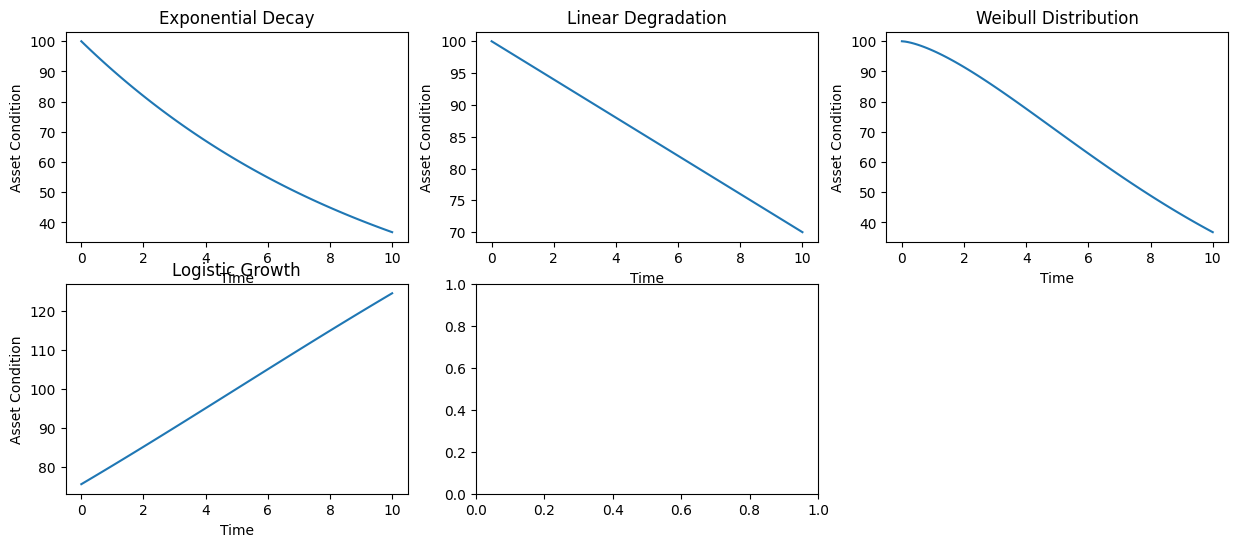

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Exponential Decay Model
def exponential_decay(asset, events, times):
    C0 = asset['initial_condition']
    k = asset['decay_rate']
    conditions = [C0 * math.exp(-k * t) for t in times]
    return conditions

# Linear Degradation Model
def linear_degradation(asset, events, times):
    C0 = asset['initial_condition']
    m = asset['degradation_rate']
    conditions = [C0 - m * t for t in times]
    return conditions

# Weibull Distribution Model (Cumulative Distribution Function)
def weibull_cdf(asset, events, times):
    scale = asset['scale_parameter']
    shape = asset['shape_parameter']
    conditions = [(math.exp(-((t / scale) ** shape))-1)*100+100 for t in times]
    return conditions

# Logistic Growth Model
def logistic_growth(asset, events, times):
    Cmax = asset['maximum_condition']
    k = asset['growth_rate']
    t0 = asset['inflection_point']
    conditions = [Cmax / (1 + math.exp(-k * (t - t0))) for t in times]
    return conditions

# Piecewise Function for Maintenance
def piecewise_maintenance(asset, events, times):
    conditions = asset['conditions']
    event_times = [event['time'] for event in events]
    condition_changes = [conditions[i] for i, event_time in enumerate(event_times) if event_time <= max(times)]
    conditions = []
    for t in times:
        if any(event_time <= t for event_time in event_times):
            conditions.append(condition_changes[0])
            condition_changes.pop(0)
        elif conditions != []:
            conditions.append(conditions[-1])
    return conditions

# Define times for plotting
times = np.linspace(0, 10, 100)

# Example asset and events
asset = {
    'initial_condition': 100,
    'decay_rate': 0.10,
    'degradation_rate': 3,
    'scale_parameter': 10,
    'shape_parameter': 1.5,
    'maximum_condition': 200,
    'growth_rate': 0.1,
    'inflection_point': 5,
    'conditions': [100, 90, 80, 70]
}

events = [
    {'event': 'Event 1', 'time': 2},
    {'event': 'Event 2', 'time': 5},
    {'event': 'Event 3', 'time': 8}
]

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(2, 3, 1)
plt.plot(times, exponential_decay(asset, events, times))
plt.title('Exponential Decay')
plt.xlabel('Time')
plt.ylabel('Asset Condition')

plt.subplot(2, 3, 2)
plt.plot(times, linear_degradation(asset, events, times))
plt.title('Linear Degradation')
plt.xlabel('Time')
plt.ylabel('Asset Condition')

plt.subplot(2, 3, 3)
plt.plot(times, weibull_cdf(asset, events, times))
plt.title('Weibull Distribution')
plt.xlabel('Time')
plt.ylabel('Asset Condition')

plt.subplot(2, 3, 4)
plt.plot(times, logistic_growth(asset, events, times))
plt.title('Logistic Growth')
plt.xlabel('Time')
plt.ylabel('Asset Condition')

plt.subplot(2, 3, 5)
plt.plot(times, piecewise_maintenance(asset, events, times))
plt.title('Piecewise Maintenance')
plt.xlabel('Time')
plt.ylabel('Asset Condition')

plt.tight_layout()
plt.show()
